# File Layout

###

In [155]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms

In [156]:
def linreg(x1,y1):
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)
    model.fit(x1, y1)
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    plt.scatter(x1, y1,color='g')
    plt.plot(x1, model.predict(x1),color='k')

In [255]:

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    #print((Z.shape))
    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z <= threshold)

    # Minimal dimension of image
    p = min(Z.shape)
    
    
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))
    
    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)
    #print(sizes)
    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    return -coeffs[0], x, y


#coeff, x, y  = fractal_dimension(I)
#print("Minkowski–Bouligand dimension (computed): ", coeff)
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [271]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    #
    I = cv2.bitwise_not(I)
    #
    I = I/256
    
    coeff, x, y  = fractal_dimension(I, pixel_threshold)
    #print("Minkowski–Bouligand dimension (computed): ", coeff)
    return coeff, x, y

In [257]:
def save_csv(xs, ys, filename):
    data_dict = []
    for i in  range(len(xs)):
        xval = str(xs[i])
        yval = str(ys[i])
        temp = dict(xs = xval, ys = yval)
        data_dict.append(temp)

    field_names = ['xs', 'ys']
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(data_dict)

In [258]:
coeff, x, y = start("./SelfSimilarFractals/koch.png")
save_csv(x, y, "./csvs/koch.csv")

Minkowski–Bouligand dimension (computed):  1.3110543559930796


In [192]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
save_csv(x, y, "./csvs/sierpinski.csv")

Minkowski–Bouligand dimension (computed):  1.5085197693702377


In [193]:
coeff, x, y = start("./SelfSimilarFractals/kochCurve.png")
save_csv(x, y, "./csvs/kochCurve.csv")

Minkowski–Bouligand dimension (computed):  1.166712683774207


### Thresholds

In [239]:
#temp = [round(0.1*i, 2) for i in range(10)]
temp = np.arange(0,0.9, 0.02).tolist()
temp = [round(i,2) for i in temp ]
temp=temp[2:]
#temp

In [272]:
koch_thresh = {}
for i in temp:
    coeff, x, y  = start("./SelfSimilarFractals/koch.png", i)
    koch_thresh[i] = coeff

/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_3184/3992163741.py:40: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_3184/3992163741.py:42: RuntimeWarning: divide by zero encountered in log
  y = np.log(counts)


In [273]:
sierp_thresh = {}
for i in temp:
    coeff, x, y  = start("./SelfSimilarFractals/SierpinskiTriangleHD.png", i)
    sierp_thresh[i] = coeff

In [274]:
curve_thresh = {}
for i in temp:
    coeff, x, y  = start("./SelfSimilarFractals/kochCurve.png", i)
    curve_thresh[i] = coeff

In [275]:
old_sierp_thresh = {}
for i in temp:
    coeff, x, y  = start("./SelfSimilarFractals/sierpinski.png", i)
    old_sierp_thresh[i] = coeff

/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_3184/3992163741.py:40: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_3184/3992163741.py:42: RuntimeWarning: divide by zero encountered in log
  y = np.log(counts)


In [283]:
import math
def clean(diction):
    for key in list(diction.keys()):
        if math.isnan(diction[key]):
            del diction[key]

In [287]:
clean(old_sierp_thresh)
clean(sierp_thresh)
clean(curve_thresh)
clean(koch_thresh)

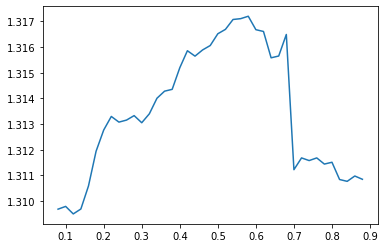

In [288]:
plt.plot(koch_thresh.keys(), koch_thresh.values())

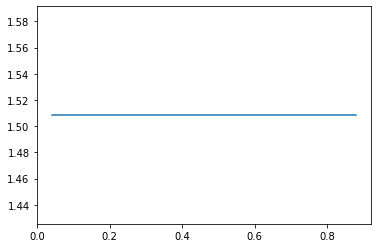

In [289]:
plt.plot(sierp_thresh.keys(), sierp_thresh.values())

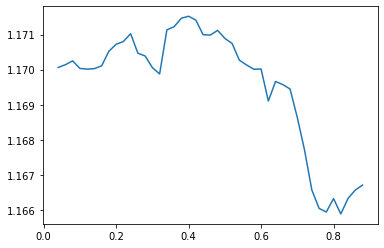

In [290]:
plt.plot(curve_thresh.keys(), curve_thresh.values())

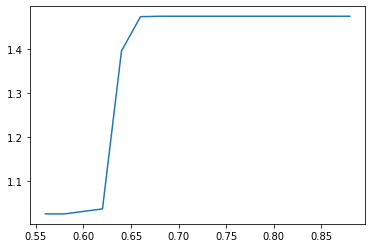

In [291]:
plt.plot(old_sierp_thresh.keys(), old_sierp_thresh.values())

intercept: [11.20459123]
slope: [[-1.50851977]]


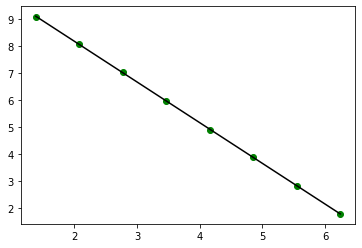

In [30]:
linreg(x, y)

In [31]:
coeff, x, y = start("./SelfSimilarFractals/greatbritain.png")
save_csv(x, y, "./csvs/greatbritain.csv")

Minkowski–Bouligand dimension (computed):  1.1896829330855272


intercept: [8.35180173]
slope: [[-1.25006712]]


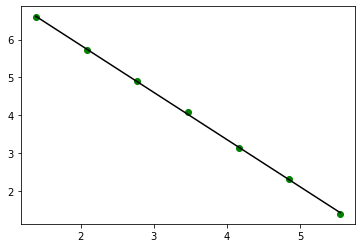

In [11]:
linreg(x,y)

image interpolation?
threshold
